In [53]:
# os - operating system
import os
# io - input/output
import io
#pandas - data manipulation
import pandas as pd
#algorithm used
import torch
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.feature_extraction.text import CountVectorizer
#data visualization
#import seaborn as sns
import matplotlib.pyplot as plt
#data manipulation
import numpy as np
from bs4 import BeautifulSoup
import seaborn as sns
import re
os.environ['KMP_DUPLICATE_LIB_OK']= 'TRUE'

In [54]:
#reading the dataset
path = 'Review_dataset/'
for root, folder, fileName in os.walk(path):
    #print(root,folder,fileName)
    break
    

In [55]:
#fetching the path of the current directory
a=os.getcwd()
print(a)

C:\Users\Srinivas Aravind\Downloads\sample_model\sample_model


In [56]:
fileName[0]

'Restaurant_Reviews.csv'

In [57]:
#Reading the dataset
df = pd.read_csv(a+'\\Review_dataset\\Restaurant_Reviews.csv',encoding='latin-1')

In [58]:
#viewing the dataset
df

,Review,Liked,Category
0,Wow... Loved this place.,1,ambience
1,Crust is not good.,0,Food taste
2,Not tasty and the texture was just nasty.,0,Food taste
3,Stopped by during the late May bank holiday of...,1,recommend
4,The selection on the menu was great and so wer...,1,cost
...,...,...,...
2494,Good beer & drink selection and good food sele...,1,recommend
2495,This greedy corporation will NEVER see another...,0,recommend
2496,"In the summer, you can dine in a charming outd...",1,recommend
2497,I did not expect this to be so good!,1,recommend


In [59]:
#removing the empty rows and re-assigning the index
df=df.dropna()
df.reset_index(drop=True, inplace=True)


In [60]:
#viewing the dataset after dropping the empty rows
df

,Review,Liked,Category
0,Wow... Loved this place.,1,ambience
1,Crust is not good.,0,Food taste
2,Not tasty and the texture was just nasty.,0,Food taste
3,Stopped by during the late May bank holiday of...,1,recommend
4,The selection on the menu was great and so wer...,1,cost
...,...,...,...
2487,Good beer & drink selection and good food sele...,1,recommend
2488,This greedy corporation will NEVER see another...,0,recommend
2489,"In the summer, you can dine in a charming outd...",1,recommend
2490,I did not expect this to be so good!,1,recommend


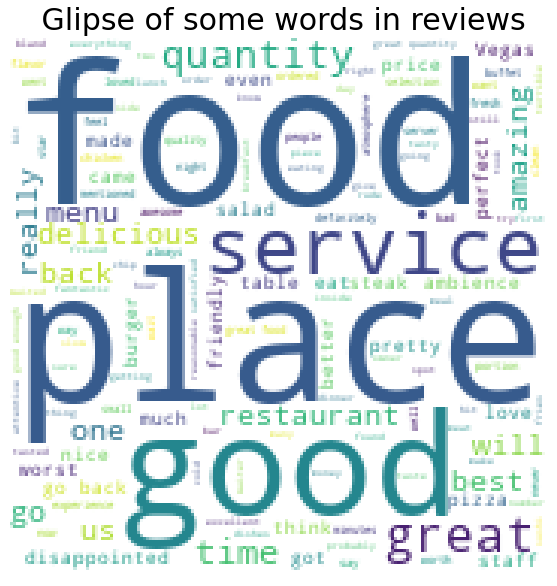

In [61]:
#Generating word clouds of reviews
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(10,10))


sub_set_ori = df
text_ori = sub_set_ori.Review
cloud_ori = WordCloud(
                          #stopwords=STOPWORDS,
                          background_color='white',
                          #collocations=False,
                          width=180,
                          height=180,
                          min_font_size=3
                          ).generate(" ".join(text_ori))

plt.axis('off')
plt.title(" Glipse of some words in reviews",fontsize=30)
plt.imshow(cloud_ori)

In [62]:
#Counting the most occuring words in reviews
from collections import Counter
count_reviews=Counter(" ".join(df['Review']).split()).most_common(50)
data1=pd.DataFrame.from_dict(count_reviews,)
data1.rename(columns={0:'words',1:'Frequency'},inplace=True)
print("Top 10 Words in Reviews")
print(data1)


Top 10 Words in Reviews
       words  Frequency
0        the       1128
1        and        905
2          I        678
3        was        638
4          a        534
5         is        515
6         to        457
7        The        405
8         of        312
9        for        274
10       not        266
11        in        240
12      food        234
13        it        213
14      very        194
15      this        188
16     place        186
17      with        175
18       are        167
19        be        155
20     great        150
21      good        147
22      they        144
23      that        138
24        at        138
25        so        136
26       had        136
27      were        133
28        my        127
29      have        127
30  quantity        125
31       but        115
32      This         99
33       you         97
34        we         97
35        on         96
36        as         93
37   service         93
38      like         83
39      just    

In [63]:
#Adding a new column in the dataset for review length before preprocessing the dataset
df['initial_review_length'] = df['Review'].apply(len)
df.head()

<ipython-input-63-50e3615f5e41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['initial_review_length'] = df['Review'].apply(len)


,Review,Liked,Category,initial_review_length
0,Wow... Loved this place.,1,ambience,24
1,Crust is not good.,0,Food taste,18
2,Not tasty and the texture was just nasty.,0,Food taste,41
3,Stopped by during the late May bank holiday of...,1,recommend,87
4,The selection on the menu was great and so wer...,1,cost,59


In [64]:
#Statistical Decription of the length of the dataset before preprocessing the dataset
df['initial_review_length'].describe()

count    2492.000000
mean       55.756019
std        30.521532
min        11.000000
25%        33.000000
50%        48.000000
75%        73.000000
max       149.000000
Name: initial_review_length, dtype: float64

In [65]:
#methods for cleaning the dataset

def removeHTMLTags(review):
    soup = BeautifulSoup(review, 'lxml')
    return soup.get_text()

def removeApostrophe(review):
    phrase = re.sub(r"won't", "will not", review)
    phrase = re.sub(r"can\'t", "can not", review)
    phrase = re.sub(r"n\'t", " not", review)
    phrase = re.sub(r"\'re", " are", review)
    phrase = re.sub(r"\'s", " is", review)
    phrase = re.sub(r"\'d", " would", review)
    phrase = re.sub(r"\'ll", " will", review)
    phrase = re.sub(r"\'t", " not", review)
    phrase = re.sub(r"\'ve", " have", review)
    phrase = re.sub(r"\'m", " am", review)
    return phrase

def removeAlphaNumericWords(review):
     return re.sub("\S*\d\S*", "", review).strip()

def removeSpecialChars(review):
     return re.sub('[^a-zA-Z]', ' ', review)

def doTextCleaning(review):
    review = removeHTMLTags(review)
    review = removeApostrophe(review)
    review = removeAlphaNumericWords(review)
    review = removeSpecialChars(review) 
    # Lower casing
    review = review.lower()  
    #Tokenization
    review = review.split()
    review = " ".join(review)
    '''#Removing Stopwords and Lemmatization
    lmtzr = WordNetLemmatizer()
    review = [lmtzr.lemmatize(word, 'v') for word in review if not word in set(stopwords.words('english'))]'''
       
    return review



In [66]:
for i in range(len(df['Review'])):
    #print(dataset['Review'][2])
    review=doTextCleaning(df['Review'][i])
    df['Review'][i]=review
    #print(dataset['Review'][i])
    
    
    
    

<ipython-input-66-77ef6a14f695>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review'][i]=review
C:\Users\Public\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [67]:
#fetching the categories available in the dataset and sorting it in ascending order
category_list=df['Category'].tolist()
category_list=list(set(category_list))
category_list.sort()
print(category_list)

['Food taste', 'ambience', 'atmosphere', 'cost', 'expierence', 'hygiene', 'menu', 'quality', 'quantity', 'recommend', 'services']


In [68]:
#created category_dict to assign a value for each category
category_dict=dict()
idx=0
for i in category_list:
    category_dict[i]=idx
    idx+=1
    

In [69]:
category_dict

{'Food taste': 0,
 'ambience': 1,
 'atmosphere': 2,
 'cost': 3,
 'expierence': 4,
 'hygiene': 5,
 'menu': 6,
 'quality': 7,
 'quantity': 8,
 'recommend': 9,
 'services': 10}

In [70]:
#assigning the respecting value of the category in the dataset

for i in range(len(df['Category'])):
    #print(df['Review'][i])
    #print(df['Category'][i])
    idx=df['Category'][i]
    df['Category'][i]=category_dict[idx]
    #i[2]=category_dict[idx]
    

<ipython-input-70-e503d2c62cdd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'][i]=category_dict[idx]


In [71]:
#viewing the dataset after assigning the values to the category
df.head(10)

,Review,Liked,Category,initial_review_length
0,wow loved this place,1,1,24
1,crust is not good,0,0,18
2,not tasty and the texture was just nasty,0,0,41
3,stopped by during the late may bank holiday of...,1,9,87
4,the selection on the menu was great and so wer...,1,3,59
5,now i am getting angry and i want my damn pho,0,4,46
6,honeslty it didn t taste that fresh,0,0,37
7,the potatoes were like rubber and you could te...,0,0,111
8,the fries were great too,1,0,25
9,a great touch,1,9,14


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Review                 2492 non-null   object
 1   Liked                  2492 non-null   int64 
 2   Category               2492 non-null   object
 3   initial_review_length  2492 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 78.0+ KB


In [73]:
#Adding a new column in the dataset for review length after preprocessing the dataset
df['processed_review_length'] = df['Review'].apply(len)
df.head()

<ipython-input-73-178b9000be21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_review_length'] = df['Review'].apply(len)


,Review,Liked,Category,initial_review_length,processed_review_length
0,wow loved this place,1,1,24,20
1,crust is not good,0,0,18,17
2,not tasty and the texture was just nasty,0,0,41,40
3,stopped by during the late may bank holiday of...,1,9,87,86
4,the selection on the menu was great and so wer...,1,3,59,58


In [74]:
#Statistical Decription of the length of the dataset
df['processed_review_length'].describe()

count    2492.000000
mean       54.065008
std        29.920861
min         9.000000
25%        32.000000
50%        47.000000
75%        71.000000
max       147.000000
Name: processed_review_length, dtype: float64

C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency of Review')

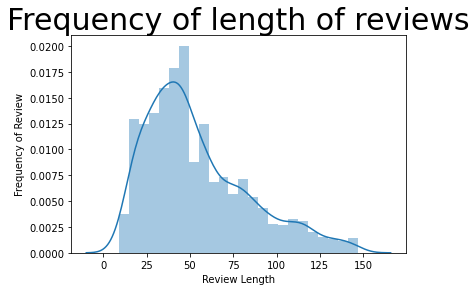

In [75]:
#Graph representing the lengths of the dataset
sns.distplot(a=df['processed_review_length'])
plt.title("Frequency of length of reviews",fontsize=30)
plt.xlabel("Review Length")
plt.ylabel("Frequency of Review")

In [76]:
list0=[]
list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
list9=[]
list10=[]
list_dict=dict()

In [77]:
#creating seperate list for each category of reviews
for i in range(len(df['Category'])):
    #print(df['Review'][i])
    #print(df['Category'][i])
    idx=df['Category'][i]
    if idx==0:
        temp=[df['Review'][i],idx]
        list0.append(temp)
    elif idx==1:
        temp=[df['Review'][i],idx]
        list1.append(temp)
    elif idx==2:
        temp=[df['Review'][i],idx]
        list2.append(temp)
    elif idx==3:
        temp=[df['Review'][i],idx]
        list3.append(temp)
    elif idx==4:
        temp=[df['Review'][i],idx]
        list4.append(temp)
    elif idx==5:
        temp=[df['Review'][i],idx]
        list5.append(temp)
    elif idx==6:
        temp=[df['Review'][i],idx]
        list6.append(temp)
    elif idx==7:
        temp=[df['Review'][i],idx]
        list7.append(temp)
    elif idx==8:
        temp=[df['Review'][i],idx]
        list8.append(temp)
    elif idx==9:
        temp=[df['Review'][i],idx]
        list9.append(temp)
    elif idx==10:
        temp=[df['Review'][i],idx]
        list10.append(temp)
list_dict={"list0":list0,"list1":list1,"list2":list2,"list3":list3,"list4":list4,"list5":list5,"list6":list6,"list7":list7,"list8":list8,"list9":list9,"list10":list10}
        
    #df['Category'][i]=category_dict[idx]
    #i[2]=category_dict[idx]
    

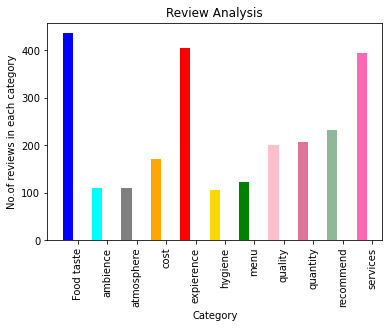

In [78]:
#graphical representation of count of reviews in each category
X = ['Food taste',
 'ambience',
 'atmosphere',
 'cost',
 'expierence',
 'hygiene',
 'menu',
 'quality',
 'quantity',
 'recommend',
 'services']
ind = np.arange(len(X)) 
width = 0.35
mycolors = ['blue', 'cyan', 'gray', 'orange', 'red','gold','green','pink','#DD7596','#8EB897','hotpink']
length_reviews_category=[len(list0),len(list1),len(list2),len(list3),len(list4),len(list5),len(list6),len(list7),len(list8),len(list9),len(list10)]
  
xvals = length_reviews_category
bar1 = plt.bar(ind, xvals, width, color = mycolors)
  
'''yvals = plot_list_negative
bar2 = plt.bar(ind+width, yvals, width, color='r')'''
  
plt.xlabel("Category")
plt.ylabel('No.of reviews in each category')
plt.title("Review Analysis")
  
plt.xticks(ind+width,X,rotation=90)
#plt.xticks([item for item in range (11)], X,)
#plt.legend( (bar1), ('Positive', 'Negative') )
plt.show()

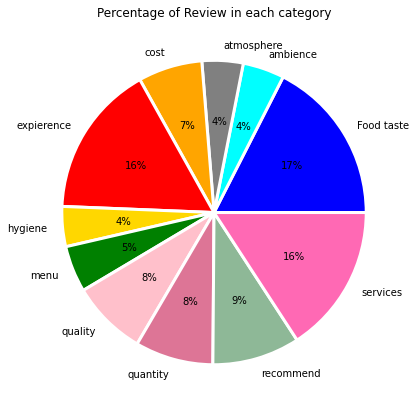

In [79]:
# graphical representation of the dataset for review classification
category_names = ['Food taste', 'ambience', 'atmosphere', 'cost', 'expierence', 'hygiene', 'menu', 'quality', 'quantity', 'recommend', 'services']
 
data = [len(list0),len(list1),len(list2),len(list3),len(list4),len(list5),len(list6),len(list7),len(list8),len(list9),len(list10)]
mycolors = ['blue', 'cyan', 'gray', 'orange', 'red','gold','green','pink','#DD7596','#8EB897','hotpink']
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = category_names, autopct='%.0f%%',colors=mycolors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Percentage of Review in each category")
# show plot
plt.show()

In [80]:
#splitting the dataset into training and testing data list
train_list=[]
test_list=[]
for i in list_dict:
    length=int(len(list_dict[i])*75)//100
    train_list+=list_dict[i][:length]
    test_list+=list_dict[i][length:]
    

In [81]:
print(len(train_list))
print(len(test_list))

1865
627


In [82]:
print(train_list[:5])
print(test_list[-5:-1])

[['crust is not good', 0], ['not tasty and the texture was just nasty', 0], ['honeslty it didn t taste that fresh', 0], ['the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer', 0], ['the fries were great too', 0]]
[['and the chef was generous with his time even came around twice so we can take pictures with him', 10], ['awesome service and food', 10], ['service was slow and not attentive', 10], ['your staff spends more time talking to themselves than me', 10]]


In [83]:
#creating training dataset
train_df = pd.DataFrame(train_list)
train_df.columns = ["text", "labels"]


In [84]:
#creating testing dataset
eval_df = pd.DataFrame(test_list)
eval_df.columns = ["text", "labels"]



In [85]:
#viewing the tarining dataset
train_df.head()

,text,labels
0,crust is not good,0
1,not tasty and the texture was just nasty,0
2,honeslty it didn t taste that fresh,0
3,the potatoes were like rubber and you could te...,0
4,the fries were great too,0


In [86]:
#viewing testing dataset
eval_df.head()

,text,labels
0,great food,0
1,the fried rice was dry as well,0
2,the sweet potato tots were good but the onion ...,0
3,what a great double cheeseburger,0
4,the plantains were the worst i ve ever tasted,0


In [87]:
#model_reddit_cpu=torch.load(path,map_location=torch.device('cpu'))
#path=a+"\\reddit_bert_uncased.pt"
#setting up the model for review classification training
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=3)

# Create a ClassificationModel
model = ClassificationModel(
    "roberta", "roberta-base",
    num_labels=11,
    args=model_args,
    use_cuda=False
) 


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

In [88]:
'''# Training the model and saving it.
model.train_model(train_df, output_dir =a+"\\review_category_classification")'''

'# Training the model and saving it.\nmodel.train_model(train_df, output_dir =a+"\\review_category_classification")'

# sentiment analysis

In [89]:
#seperating the positive and negative reviews
negative_list0=[]
positve_list1=[]
for i in range(len(df['Liked'])):
    #print(df['Review'][i])
    #print(df['Category'][i])
    idx=df['Liked'][i]
    if idx==0:
        temp=[df['Review'][i],idx]
        negative_list0.append(temp)
    elif idx==1:
        temp=[df['Review'][i],idx]
        positve_list1.append(temp)

In [90]:
#viewing the length of positive nad negative reviews
print(len(negative_list0))
print(len(positve_list1))

1225
1267


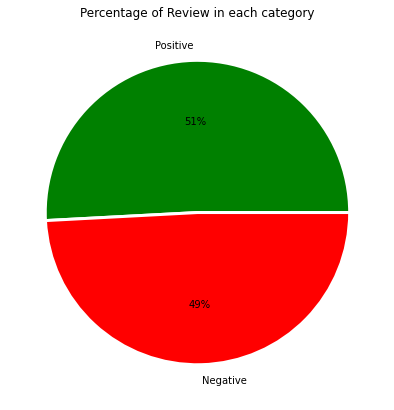

In [91]:
# graphical representation of the dataset for sentiment Analysis
category_names = ['Positive','Negative']
data = [len(positve_list1), len(negative_list0)]
mycolors = ['green', 'red']
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = category_names, autopct='%.0f%%',colors=mycolors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Percentage of Review in each category")
# show plot
plt.show()

In [92]:
#creating the traing and testing list for sentiment analysis
senti_train_list=[]
senti_test_list=[]
pos_length=int(len(positve_list1)*80)//100
neg_length=int(len(negative_list0)*80)//100
senti_train_list+=positve_list1[:pos_length]+negative_list0[:neg_length]
senti_test_list+=positve_list1[pos_length:]+negative_list0[neg_length:]

In [93]:
#configuring the model for training the sentiment analysis model
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Preparing train data

senti_train_df = pd.DataFrame(senti_train_list)
senti_train_df.columns = ["text", "labels"]

# Preparing eval data

senti_eval_df = pd.DataFrame(senti_test_list)
senti_eval_df.columns = ["text", "labels"]

# Optional model configuration
senti_model_args = ClassificationArgs(num_train_epochs=3)

# Create a ClassificationModel
senti_model = ClassificationModel(
    "roberta", "roberta-base", args=senti_model_args, use_cuda=False
)



Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

In [94]:
#viewing the traing dataset of sentiment analysis
senti_train_df

,text,labels
0,wow loved this place,1
1,stopped by during the late may bank holiday of...,1
2,the selection on the menu was great and so wer...,1
3,the fries were great too,1
4,a great touch,1
...,...,...
1988,all my family members got sick after eating there,0
1989,my boyfriend got really sick after eating there,0
1990,it is not a hygienic place to dine,0
1991,the place has so much dirt,0


In [95]:
#viewing the testing dataset of sentiment analysis
senti_eval_df

,text,labels
0,quantity exactly same as mentioned in the menu,1
1,the atmosphere is great for dinner dtae,1
2,the melody songs at night hits different and v...,1
3,it has has family restaurts feels and atmosphe...,1
4,the yellow light melo songs and great food mad...,1
...,...,...
494,for a self proclaimed coffee cafe i was wildly...,0
495,i think not again,0
496,i hate to disagree with my fellow yelpers but ...,0
497,i live in the neighborhood so i am disappointe...,0


In [96]:
# Training the sentiment analysis model and saving it
#senti_model.train_model(train_df)



# Training is completed. Now with the trained model the results will be fetched

In [97]:
#loading the reviwe classification model from the saved directory
model_load_review = ClassificationModel(
    "roberta", a+"\\review_category_classifi",use_cuda=False
)

In [98]:
# Evaluate the reviwe classification model
result, model_outputs, wrong_predictions = model_load_review.eval_model(eval_df)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_roberta_128_11_2


INFO:simpletransformers.classification.classification_model:{'mcc': 0.7870811189572927, 'eval_loss': 0.6321061290329015}


In [99]:
#fetching the accuarcy of the trained review classification model
print("results",result)
#print("wrong",(len(wrong_predictions)))


results {'mcc': 0.7870811189572927, 'eval_loss': 0.6321061290329015}


In [100]:
#loading the trained model of sentiment analysis
model_senti__load = ClassificationModel(
    "roberta", os.getcwd()+"\\sentiAnal_outputs",use_cuda=False
)

In [101]:
# Evaluate the sentiment analysis model
result, model_outputs, wrong_predictions = model_senti__load.eval_model(eval_df =senti_eval_df,output_dir =os.getcwd()+"\\senti_eval_results_testing")


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_roberta_128_2_2


INFO:simpletransformers.classification.classification_model:{'mcc': 0.9358902319909262, 'tp': 245, 'tn': 238, 'fp': 7, 'fn': 9, 'auroc': 0.9919010123734533, 'auprc': 0.9928178439310903, 'eval_loss': 0.17749533282513436}


In [102]:
#fetching the accuarcy of the trained sentiment analysis
print(result)

{'mcc': 0.9358902319909262, 'tp': 245, 'tn': 238, 'fp': 7, 'fn': 9, 'auroc': 0.9919010123734533, 'auprc': 0.9928178439310903, 'eval_loss': 0.17749533282513436}


# Now with the trained model all the reviwes will be claassified into 11 different categories 

In [103]:

predict_list=df['Review'].tolist()

In [104]:
print(predict_list[:5])
print(len(predict_list))

['wow loved this place', 'crust is not good', 'not tasty and the texture was just nasty', 'stopped by during the late may bank holiday off rick steve recommendation and loved it', 'the selection on the menu was great and so were the prices']
2492


In [105]:
#THIS CELL WILL TAKE SOME TIME
#predicting the categories for all the reviwes with the trained model
total_predictions, total_raw_outputs = model_load_review.predict(predict_list)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


In [106]:
temp_total_predictions=total_predictions
print(len(total_predictions))

2492


In [107]:
food_taste=[]
ambience=[]
atmosphere=[]
cost=[]
expierence=[]
hygiene=[]
menu=[]
quality=[]
quantity=[]
recommend=[]
services=[]
senti_predicted_list=[[] for x in range(11)]
for i in range(len(total_predictions)):
    if total_predictions[i]==0:
        food_taste.append(predict_list[i])
    if total_predictions[i]==1:
        ambience.append(predict_list[i])
    if total_predictions[i]==2:
        atmosphere.append(predict_list[i])
    if total_predictions[i]==3:
        cost.append(predict_list[i])
    if total_predictions[i]==4:
        expierence.append(predict_list[i])
    if total_predictions[i]==5:
        hygiene.append(predict_list[i])
    if total_predictions[i]==6:
        menu.append(predict_list[i])
    if total_predictions[i]==7:
        quality.append(predict_list[i])
    if total_predictions[i]==8:
        quantity.append(predict_list[i])
    if total_predictions[i]==9:
        recommend.append(predict_list[i])
    if total_predictions[i]==10:
        services.append(predict_list[i])
        
        

In [108]:
#creating a nested list of each categorised set of reviews

category_list=[food_taste, ambience, atmosphere, cost, expierence, hygiene, menu, quality, quantity, recommend, services]


In [109]:
category_list[5][:5]

['i was disgusted because i was pretty sure that was human hair',
 'i guess i should have known that this place would suck because it is inside of the excalibur but i didn t use my common sense',
 'walked in and the place smelled like an old grease trap and only others there eating',
 'it was probably dirt',
 'when my order arrived one of the gyros was missing']

# Now we pass this list which is having list of reviwes of each category into our trained sentiment analysis model in which we will get the sentiment analysis for each category of reviwes.

In [110]:
senti_predicted_list=[[] for x in range(11)]
#print(senti_predicted_list[:5])

In [111]:
#THIS CELL WILL TAKE SOME TIME
#predicting the sentiments of each category
for i in range(0, len(category_list)):
    temp_total_predictions,temp_total_raw_outputs = model_senti__load.predict(category_list[i])
    senti_predicted_list[i]+=temp_total_predictions
    

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


In [112]:

#sepearting the postive and negative reviwes of each category
plot_list_positive=[]
plot_list_negative=[]
rating=[]
idx=0
for cat in senti_predicted_list:
    #print(n)
    pos_count=cat.count(1)
    pos=(pos_count/len(cat))*5
    plot_list_positive.append(pos_count)
    plot_list_negative.append(len(cat)-pos_count)
    rating.append(pos)
    

In [113]:
#count of postive reviwes of each category
plot_list_positive

[327, 81, 97, 78, 172, 19, 81, 41, 110, 101, 167]

In [114]:
#count of negative reviwes of each category
plot_list_negative

[200, 30, 15, 80, 252, 83, 24, 122, 98, 79, 235]

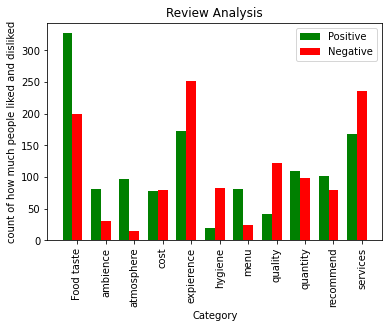

In [115]:
#graphical representation of positve and negative reviews of each category
X = ['Food taste',
 'ambience',
 'atmosphere',
 'cost',
 'expierence',
 'hygiene',
 'menu',
 'quality',
 'quantity',
 'recommend',
 'services']
ind = np.arange(len(X)) 
width = 0.35
 
xvals = plot_list_positive
bar1 = plt.bar(ind, xvals, width, color = 'g')
  
yvals = plot_list_negative
bar2 = plt.bar(ind+width, yvals, width, color='r')
  
plt.xlabel("Category")
plt.ylabel('count of how much people liked and disliked')
plt.title("Review Analysis")
  
plt.xticks(ind+width,X,rotation=90)
#plt.xticks([item for item in range (11)], X,)
plt.legend( (bar1, bar2), ('Positive', 'Negative') )
plt.show()

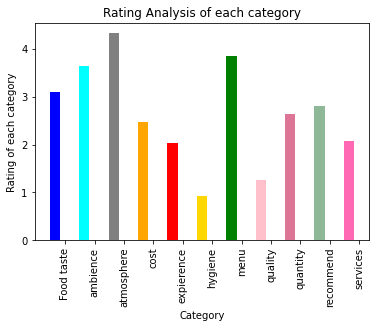

In [116]:
#graphocal representation of positve and negative reviews of each category
X = ['Food taste',
 'ambience',
 'atmosphere',
 'cost',
 'expierence',
 'hygiene',
 'menu',
 'quality',
 'quantity',
 'recommend',
 'services']
ind = np.arange(len(X)) 
width = 0.35
mycolors = ['blue', 'cyan', 'gray', 'orange', 'red','gold','green','pink','#DD7596','#8EB897','hotpink']
xvals = rating
bar1 = plt.bar(ind, xvals, width, color = mycolors)
  

  
plt.xlabel("Category")
plt.ylabel('Rating of each category')
plt.title("Rating Analysis of each category")
  
plt.xticks(ind+width,X,rotation=90)
#plt.xticks([item for item in range (11)], X,)
#plt.legend( (bar1), ('Positive', 'Negative') )
plt.show()

In [117]:
overall_rating=(sum(rating)/11)

In [118]:
print("OVERALL RATING OF THE RESTAURANT IS :",overall_rating)

OVERALL RATING OF THE RESTAURANT IS : 2.650110342937527
